C:\Users\Juho\AppData\Local\Temp\ipykernel_1416\1865337331.py:37: WavFileWarning: Chunk (non-data) not understood, skipping it.
  test_signal = read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Test Signal Impulses.wav")[1] / (2 ** 31)
C:\Users\Juho\AppData\Local\Temp\ipykernel_1416\1865337331.py:39: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp Low.wav")[1] / (2 ** 31), "Plexi Power Amp Low"],
C:\Users\Juho\AppData\Local\Temp\ipykernel_1416\1865337331.py:40: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp 12_00.wav")[1] / (2 ** 31), "Plexi Power Amp 12:00"],
C:\Users\Juho\AppData\Local\Temp\ipykernel_1416\1865337331.py:41: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp Dimed.wav")[1] / (2 ** 31), "Plexi Power Amp Dimed"]


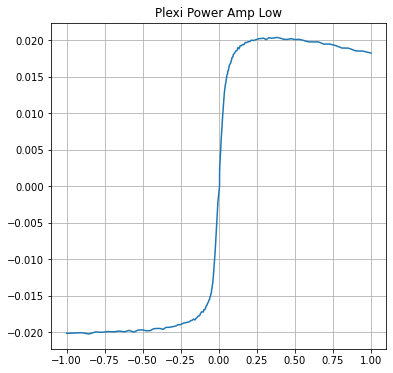

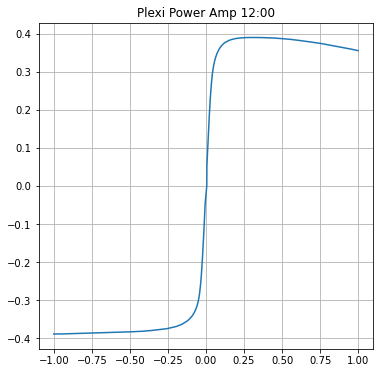

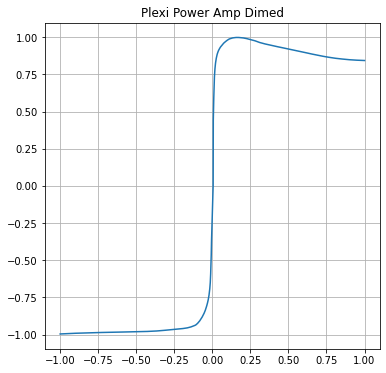

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read


def draw_graph(signal_in, signal_out, title="Result"):
    x, y = signal_in, signal_out
    y = np.roll(y, shift=-7)
    x_fp = x[x > 0.00001]
    y_fp = y[x > 0.00001]
    x_fn = x[x < -0.00001]
    y_fn = y[x < -0.00001]

    x_total = np.concatenate((x_fn[::-1], x_fp))
    y_total = np.concatenate((y_fn[::-1], y_fp))

    lookup_table = {}
    for i, x in enumerate(x_total):
        lookup_table[x] = y_total[i]
    # print(lookup_table)
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.grid()
    plt.autoscale
    # plt.xlim(-1,1)
    # plt.ylim(-1,1)
    plt.plot(x_total, y_total)
    # plt.plot(x_fn, y_fn)
    plt.xlabel = "Input"
    plt.ylabel = "Output"

    # plt.show()
    return plt, lookup_table


test_signal = read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Test Signal Impulses.wav")[1] / (2 ** 31)
results = [
    [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp Low.wav")[1] / (2 ** 31), "Plexi Power Amp Low"],
    [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp 12_00.wav")[1] / (2 ** 31), "Plexi Power Amp 12:00"],
    [read("J:\Dropbox\cbh\jk\Plexi 25 Measuring\Power Amp Dimed.wav")[1] / (2 ** 31), "Plexi Power Amp Dimed"]
]

stuff = list(map(lambda x: draw_graph(test_signal, x[0], x[1]), results))
with open(file="map.json", mode="w") as f:
    f.write(json.dumps(stuff[2][1]))
